# Imports and define expectation func

In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
from FittedModels.utils import plot_distributions, plot_samples, plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.utils import plot_distributions
from FittedModels.train import LearntDistributionManager
from Utils import plot_func2D, MC_estimate_true_expectation, plot_distribution, expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils import plot_history
import matplotlib.pyplot as plt
from TargetDistributions.MoG import MoG
from TargetDistributions.MoG import custom_MoG

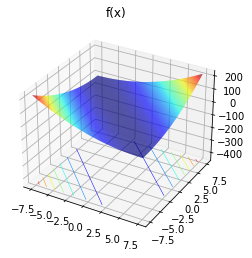

In [3]:
expectation_func_fig = plot_func2D(expectation_function, n_points=200, range=15)

# Lumpy High Dimension Flow Target Distribution

In [4]:
torch.log(torch.tensor([1000.0])), torch.exp(torch.tensor(10))

(tensor([6.9078]), tensor(22026.4648))

In [5]:
torch.set_default_dtype(torch.float64)

In [6]:
torch.manual_seed(0) # 0 breaks it within 1000 epochs
dim = 3
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=10, min_cov=0, loc_scaling=3)
true_expectation = MC_estimate_true_expectation(target, expectation_function, int(1e6))
true_expectation

tensor(7.0452)

# DReG, alpha=2

In [7]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=3, scaling_factor=5.0) #, flow_type="RealNVP")
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG", lr=1e-3)
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

In [8]:
learnt_sampler.sample((1,)).dtype, target.log_prob(learnt_sampler.sample((1,))).dtype

(torch.float64, torch.float64)

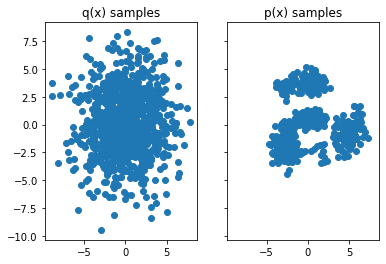

In [9]:
samples_fig_before = plot_samples(tester) # this just looks at 2 dimensions

In [10]:
history = tester.train(1000, batch_size=int(1e4), clip_grad=True, max_grad_norm=1)

loss: -2.496115145727278, mean log p_x -14.727105765528716: 100%|██████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:26<00:00,  2.59it/s]


In [11]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

True expectation estimate is 7.045156696075434 
estimate before training is 7.2600670856841685 
estimate after training is 7.194794567329096 
effective sample size before is 104.59240177031504 out of 10000
effective sample size after train is 1128.041258216274  out of 10000
variance in weights is 7.865710550708682e-08


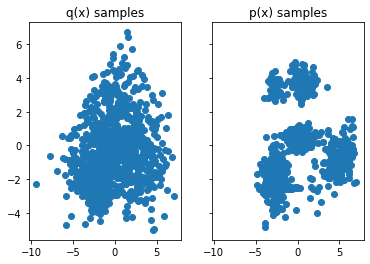

In [12]:
samples_fig_after = plot_samples(tester)

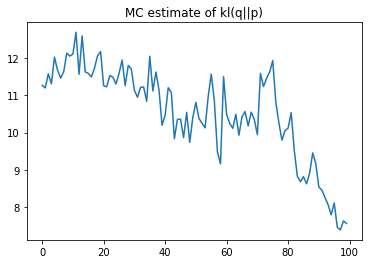

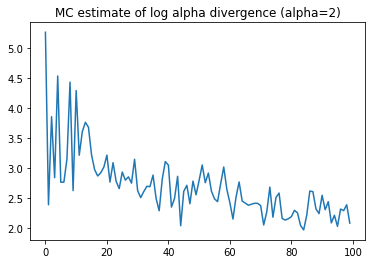

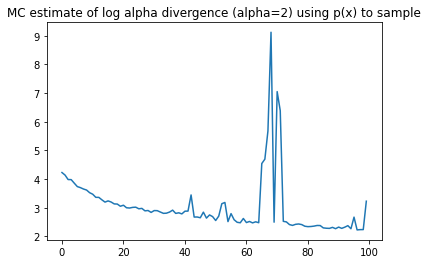

In [13]:
plot_divergences(history)

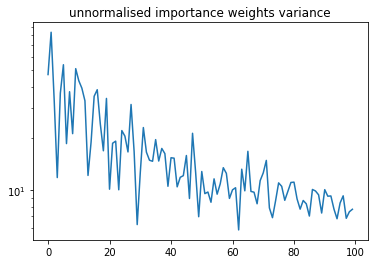

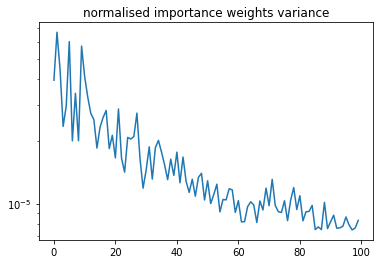

In [14]:
plot_sampling_info(history)

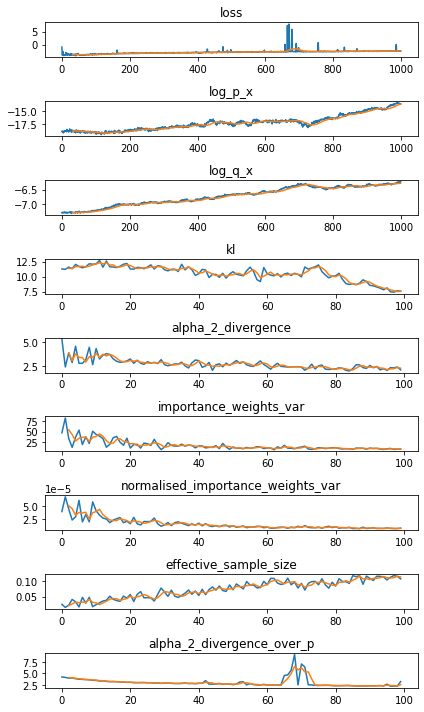

In [15]:
hist_plot = plot_history(history)

# KL

In [89]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=5, scaling_factor=4.0, flow_type="RealNVP")
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="kl")
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

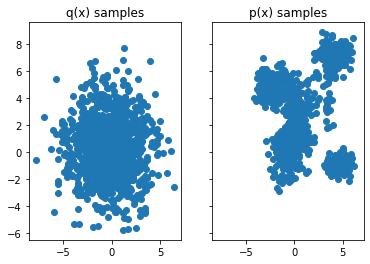

In [90]:
samples_fig_before = plot_samples(tester)

In [91]:
history = tester.train(1000, batch_size=int(1e3)) 

loss: 34.631650001270636, mean log p_x -57.18515689864601: 100%|███████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.60it/s]


In [92]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

True expectation estimate is 131.53721529701704 
estimate before training is 18.87962084632368 
estimate after training is 172.43461205618405 
effective sample size before is 1.3480608831852015 out of 10000
effective sample size after train is 7.33557911769272  out of 10000
variance in weights is 1.3623551224681734e-05


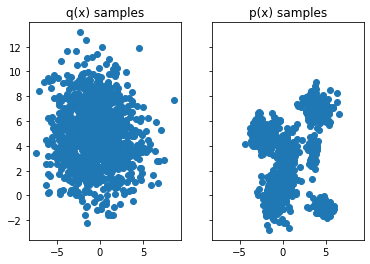

In [93]:
samples_fig_after = plot_samples(tester)

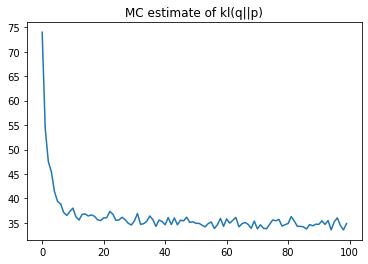

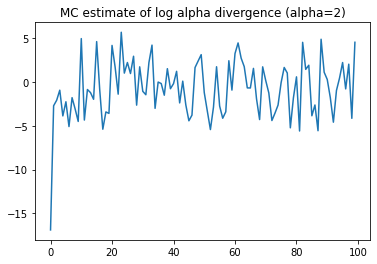

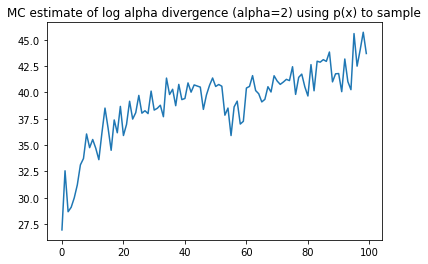

In [94]:
plot_divergences(history)

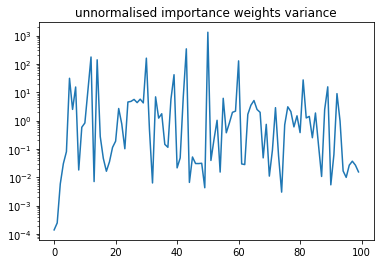

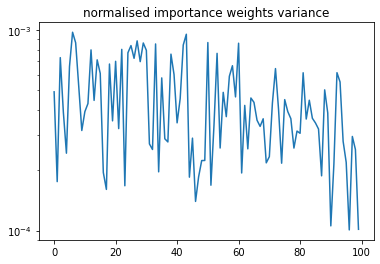

In [95]:
plot_sampling_info(history)

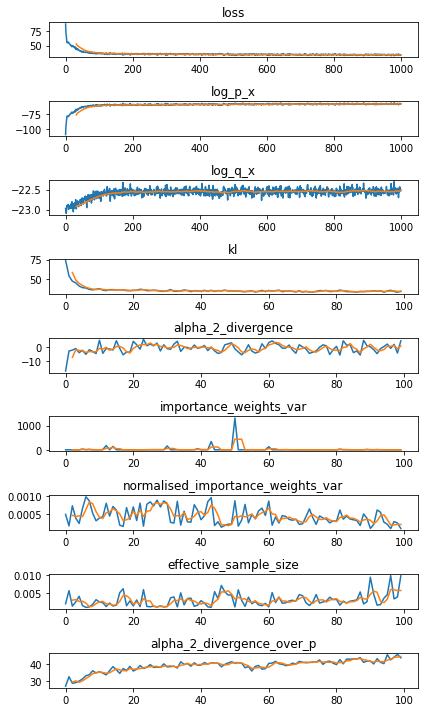

In [96]:
hist_plot = plot_history(history)